##            **Electric Vehicle Data Analysis Project**








##  **Objective**

Analyze the electric vehicle dataset to identify key factors affecting electric range, energy consumption, pricing and battery capacity and provide actionable recommendations.



```
# Here is my video link below ⬇:
```



In [ ]:
https://drive.google.com/file/d/1g4hpu9mNyLYMbGvwmmrwNjzDCG3y68AE/view?usp=sharing


`## Importing a libraries of Python`

In [ ]:
import pandas as pd

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
import numpy as np

In [ ]:
## Importing a excel file into notebook usnig pandas

In [ ]:
FEV_df=pd.read_excel("/content/drive/MyDrive/FEV_data.xlsx")

In [ ]:
print(FEV_df.tail())    ## top 5 rows

                Car full name           Make              Model  \
48      Volkswagen ID.3 Pro S     Volkswagen         ID.3 Pro S   
49        Volkswagen ID.4 1st     Volkswagen           ID.4 1st   
50  Citroën ë-Spacetourer (M)        Citroën  ë-Spacetourer (M)   
51   Mercedes-Benz EQV (long)  Mercedes-Benz         EQV (long)   
52      Nissan e-NV200 evalia         Nissan     e-NV200 evalia   

    Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
48                       179990                204                  310   
49                       202390                204                  310   
50                       215400                136                  260   
51                       339480                204                  362   
52                       164328                109                  254   

                Type of brakes   Drive type  Battery capacity [kWh]  \
48  disc (front) + drum (rear)   2WD (rear)                    77.0   
49  

## TASK 1




```
# a)
## Filter out EVs based on price and range criteria
## budget of 350,000 PLN and EV with a range of 400
```



In [ ]:
Filter_EVs = FEV_df[(FEV_df['Minimal price (gross) [PLN]'] <= 350000) &
(FEV_df['Range (WLTP) [km]'] >= 400)]

In [ ]:
sorted_Evs = Filter_EVs.sort_values(
by='Minimal price (gross) [PLN]', ascending = False)

In [ ]:
print(sorted_Evs[["Make","Minimal price (gross) [PLN]", "Range (WLTP) [km]"]])

             Make  Minimal price (gross) [PLN]  Range (WLTP) [km]
0            Audi                       345700                438
22  Mercedes-Benz                       334700                414
8             BMW                       282900                460
41          Tesla                       260490                567
40          Tesla                       235490                580
49     Volkswagen                       202390                500
39          Tesla                       195490                430
48     Volkswagen                       179990                549
15        Hyundai                       178400                449
18            Kia                       167990                455
20            Kia                       160990                452
47     Volkswagen                       155890                425




```
# Insights
```
*   The Audi car has the minimal price of 3,45,700 with a range of 438.
* then Mercedes-Benz , BMW, Tesla and so on... so, this are the car whose PLN
*   are below 350,000 and EV with a range of >=400.







```
# # b) & c)
## Grouping the data based on manufacturer
## with aggregate function to calculate the average of battery capacity
## it gives average of battery capacity for each manufacturer
```



In [ ]:
grouped = Filter_EVs.groupby('Make')["Battery capacity [kWh]"].mean()

# sorting a column in descending order to see the highest value

sorted = grouped.sort_values(ascending = False)

grouped_df = pd.DataFrame(sorted)

print(grouped_df)


               Battery capacity [kWh]
Make                                 
Audi                        95.000000
BMW                         80.000000
Mercedes-Benz               80.000000
Volkswagen                  70.666667
Tesla                       68.000000
Hyundai                     64.000000
Kia                         64.000000




```
# Insights

```


* After calculating the average of battery cap.
* it shows that the highest average battery cap. of a car is
*   that of Audi cars, which is 95.000000.
*   followed by BMW with an avg battery cap. of 80.000000, and so on.




## TASK 2



```
# a)
## To find the percentile of mean-Engery Consumption [kWh/100 km]
## calculating q1 and q3
## 30th and 70th percentile
```



In [ ]:
q1 = FEV_df['mean - Energy consumption [kWh/100 km]'].quantile(0.30) #30th
q3 = FEV_df['mean - Energy consumption [kWh/100 km]'].quantile(0.70) #70th

## calculate IQR(interquatile range)

IQR = q3 - q1

##define the outliers energy consumption

Low_energy = q1 - 0.5 * IQR
High_energy = q3 + 0.5 * IQR

print("Q1:", q1)
print("Q3:", q3)
print("IQR:", IQR)

print("Low energy:", Low_energy)
print("High energy:", High_energy)

## Identify unusually high & low energy consumption

outliers = FEV_df[
    (FEV_df['mean - Energy consumption [kWh/100 km]'] < Low_energy) |
    (FEV_df['mean - Energy consumption [kWh/100 km]'] > High_energy)]

sorted_outliers = outliers.sort_values(
    by='mean - Energy consumption [kWh/100 km]', ascending = False)

print("\nOutliers", sorted_outliers[[
    "Make","mean - Energy consumption [kWh/100 km]"]])


Q1: 15.88
Q3: 21.994999999999997
IQR: 6.114999999999997
Low energy: 12.822500000000002
High energy: 25.052499999999995

Outliers              Make  mean - Energy consumption [kWh/100 km]
51  Mercedes-Benz                                   28.20
2            Audi                                   27.55
5            Audi                                   27.20
52         Nissan                                   25.90
50        Citroën                                   25.20
33        Porsche                                   25.10




```
# Insights
```
*   30th percentile (Q1) = 15.88
*   70th percentile (Q3) = 21.994
*   difference between 70th and 30th percentile is 6.11
*   lower engery consumption is: 12.822
*   high energy consumption is: 25.05












```
## b)
## to plot box plot graph to understand the outliers

```





```
# Relationship between Mean-Energy consumption and Manufacturer
```



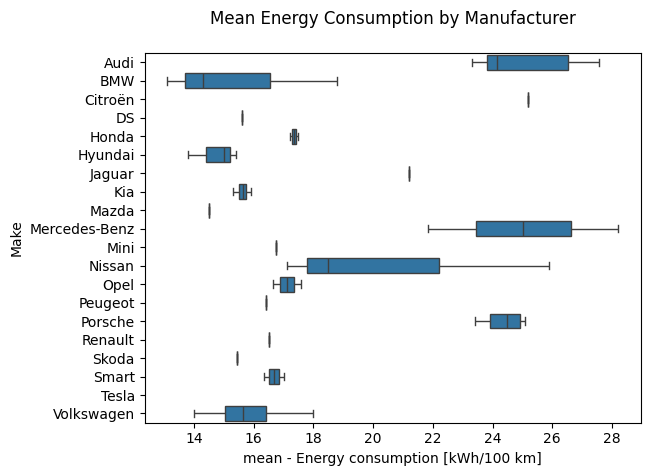

In [ ]:
sns.set_style= ("whitegrid")
sns.set_palatte= ("husl")

 ## it shows graph between mean - Energy consumption and Manufacturer(Make)

sns.boxplot(x="mean - Energy consumption [kWh/100 km]",
y ="Make", data = FEV_df)

plt.title("Mean Energy Consumption by Manufacturer\n")

plt.show()




```
# Insights
```


*   Boxplots are useful for visualizing the distribution of data and identifying outliers.

1.  Range of Energy Consumption:

*  The energy consumption varies significantly across car brands.

*  Tesla shows the lowest mean energy consumption, centered around 14 kWh/100 km.
* Brands like Mercedes-Benz, Audi and Nissan have higher energy consumption means, often exceeding 22 kWh/100 km.

2.   Outliers:

*  Some brands, such as DS, Renault, Jaugar and Mini, display outliers in the graph. This suggests that specific models consume significantly more or less energy compared to the rest of the cars in the same brand.

## TASK 3



```
## Create a suitable plot to visualize
## strong relationship between battery capacity and range.

## Scatter plot is best to visualize the relationship
## between battery capacity and range
```



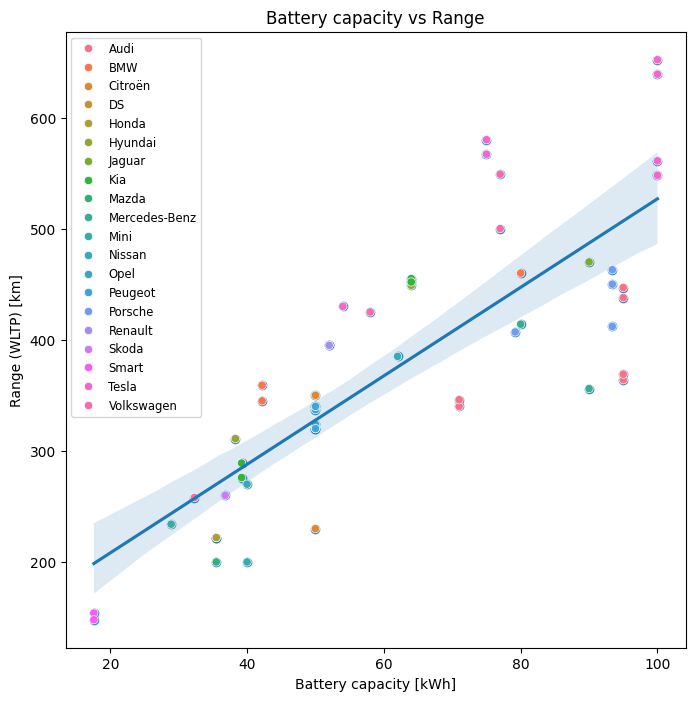

In [ ]:
plt.figure(figsize=(8, 8))

# regression line shows the positive correlation
# between battery cap. and range

sns.regplot(
x = "Battery capacity [kWh]",
y = "Range (WLTP) [km]", data = FEV_df
)

sns.scatterplot(
x = "Battery capacity [kWh]",
y = "Range (WLTP) [km]",
data = FEV_df, hue = "Make"
)

plt.title("Battery capacity vs Range")
plt.legend(fontsize = "small")
plt.title("Battery capacity vs Range")
plt.show()




```
# Insights:

```

*   A scatter plot paired with a regression line is a best choice for visualizing the relationship between two continuous variables, such as battery capacity and range.

*   The graph illustrates a positive correlation, indicating that as battery capacity increases, the range of the car tends to increase proportionally. This trend is highlighted by the blue regression line, which represents the overall pattern of the data.

*   Data points close to the regression line indicate cars that follow the expected trend of increasing range with increasing battery capacity, showing a strong relationship.

*   Points far from the regression line represent outliers or vehicles that deviate from the trend.








## TASK 4



```
# Build an EV recommendation class
# user input
```



In [ ]:
class EVRecommendation:
    def __init__(self, budget, desired_range, battery_capacity):

        self.budget = budget
        self.desired_range = desired_range
        self.battery_capacity = battery_capacity

    def recommendation(self):

        # Filter EVs based on user criteria

        filtered_evs = FEV_df[
        (FEV_df['Minimal price (gross) [PLN]'] <= self.budget) &
        (FEV_df['Range (WLTP) [km]'] >= self.desired_range) &
        (FEV_df['Battery capacity [kWh]'] >= self.battery_capacity)
        ]

        # Sort the filtered EVs by battery capacity (descending)

        sorted_evs = filtered_evs.sort_values(
        by="Battery capacity [kWh]", ascending=False
        )

        # Select the top 3 EVs

        top_3_evs = sorted_evs.nlargest(3, "Battery capacity [kWh]")

        return top_3_evs[['Car full name', 'Minimal price (gross) [PLN]',
        'Range (WLTP) [km]', 'Battery capacity [kWh]']]

ev_data = EVRecommendation(budget=300000, desired_range=400,
battery_capacity=54.00)  # User input values

top_3_cars = ev_data.recommendation()

print(top_3_cars)


            Car full name  Minimal price (gross) [PLN]  Range (WLTP) [km]  \
8                 BMW iX3                       282900                460   
48  Volkswagen ID.3 Pro S                       179990                549   
49    Volkswagen ID.4 1st                       202390                500   

    Battery capacity [kWh]  
8                     80.0  
48                    77.0  
49                    77.0  




```
# Insights
```


*   the top 3 cars are: BMW iX3, Volkswagen ID.3 Pro S,  Volkswagen ID.4 1st  
*   with Battery Capacity: 80.0, 77.0, 77.0

*   with budget of 3,00,000 and range >= 400


            





## TASK 5

In [ ]:
## Inferential Statistics – Hypothesis Testing

from scipy.stats import ttest_ind

## fetch the data for Tesla and Audi

tesla_data = FEV_df[FEV_df['Make'] == 'Tesla']
['Engine power [KM]'].dropna()

audi_data = FEV_df[FEV_df['Make'] == 'Audi']
['Engine power [KM]'].dropna()

# print("Tesla\n",tesla_data)
# print("Audi\n",audi_data)

## to perform t-test for two sample

t_stat, p_value = ttest_ind(tesla_data, audi_data)

print(f"T-statistic: {t_stat:.2f}")

print(f"P-value: {p_value:.2f}")

print("\nmean_tesla: ", tesla_data.mean())
print(f"mean_audi: {audi_data.mean():.2f}")
print(f"\nstd_tesla: {tesla_data.std():.2f}")
print(f"std_audi: {audi_data.std():.2f}")


T-statistic: 1.70
P-value: 0.12

mean_tesla:  533.0
mean_audi: 392.00

std_tesla: 184.66
std_audi: 88.51


In [ ]:
## to calculate the significance level

CI = 0.95 ## CI = 0.95

alpha = 1 - CI  ## 95% confidence interval

print(f"\nalpha: {alpha:.2f}")

if p_value < alpha:  ## 0.12 < 0.05

  print("\nResult:", "Reject the null hypothesis.")

else:
  print("\nResult:", "Fail to reject the null hypothesis.")

# It fail to reject null hypothesis when it does not meets the criteria.


alpha: 0.05

Result: Fail to reject the null hypothesis.


In [ ]:
#Insights and recommendation

if tesla_data.mean() > audi_data.mean():

## Tesla mean engine power is higher than Audi i.e. 533.0 > 392.00

    print("Tesla's average engine power appears to be higher.")
else:
    print("Audi's average engine power appears to be higher.")

Tesla's average engine power appears to be higher.




```
# Histrogram Chart
```



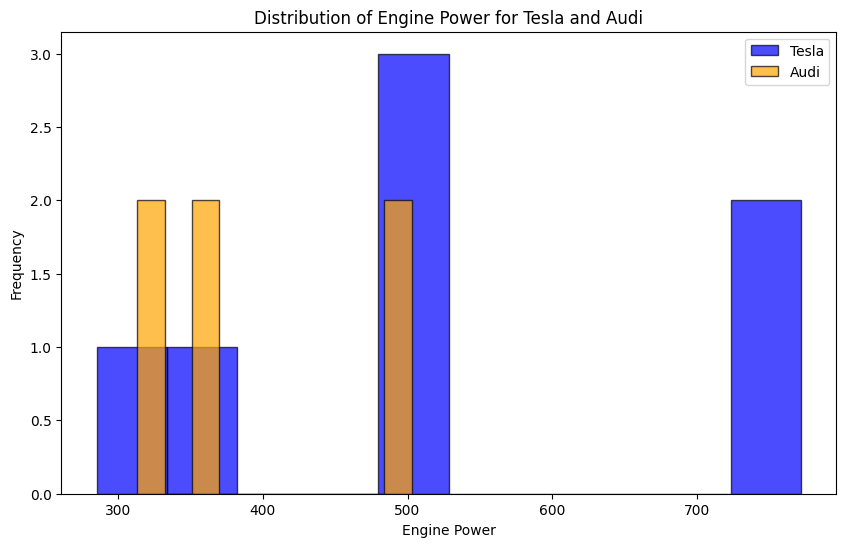

In [ ]:
## Build a graph to show the distribution of engine power

plt.figure(figsize=(10, 6))
plt.hist(
    tesla_data, bins=10, alpha=0.7,
         label='Tesla', color='blue',
         edgecolor='black'
         )

plt.hist(
    audi_data, bins=10, alpha=0.7,
         label='Audi',
         color='orange', edgecolor='black'
         )

plt.xlabel('Engine Power')
plt.ylabel('Frequency')
plt.title('Distribution of Engine Power for Tesla and Audi')
plt.legend()
plt.show()



```
# Insights and Recommendations
```


1. Engine Power Range of cars:

*   Tesla has a broader range of engine power, between 300 to 700.
*   Audi has a range between 300 to 500 only. It is comparatively lower than a Tesla car.

2. Most Frequent Engine Power:

*  Tesla's most frequent engine power is 500, with a frequency of 3.0.
*  Audi has its highest frequency at both 300 and 400, each occurring twice.

3. Unique Power Levels:

*   Tesla has a unique engine power at 700, where Audi has no vehicles in that range.

4. Recommendations:

*  Audi cars need to expand their engine power options to compete with Tesla car.
















```
# Why Histrogram:
```


* because it effectively shows the distribution of engine power for Tesla and Audi.
* Highlights differences and overlaps between Tesla and Audi in terms of power levels.

* The histogram makes it easy to compare these distributions side-by-side.




